## MIRI Coronographic data
Analysis of TWA 7 (Lagrange et al. 2025): measurement of point-source photometry, after subtracting stellar diffraction (using the Notebook_TWA7_stellar_sub.ipynb).

In [ ]:
#Useful package
import numpy as np
import glob, os
from astropy.io import fits
import matplotlib.pyplot as plt
import webbpsf

# Personal import from ExoCAT
from utils import *
from miri_corono import *
from miri_photometry import *

In [2]:
name_system = 'TWA7'
filter_name = 'F1140C'
wavelength_filter = 11.3
nb_filters = len(filter_name)
lambdaD_pix = ((wavelength_filter*10**-6)/6.57)*(180*3600/np.pi) / pix_size

# Center corono : DEC, RA 
yxc1065 = [112.00, 120.25]  
yxc1140 = [112.16, 119.77]
yxc1550 = [113.20, 119.73] 
yxc2330 = [167.88, 144.33]  
center_corono = np.array(yxc1140) # define the filter of the obs


# Number of the observations (useful to order, save & retrieve the data)
num_obs = [1,2,3,4,5] # science roll 1, roll 2, background, ref, ref background

pixel_area = 2.84403609523084E-13

### priors on the planet's position (if known)
RA_Offset = -1.1
Dec_Offset = 1.01

path = f"/Users/mmalin/MIRI/Corono/DATA/{name_system}/" # data Directory
output_dir = path+name_system+f"_outputs/" # where to save the output

# Rotation angle (for final plot): 
files = path+f"stage2_photom/obs{num_obs[0]}/TWA7_dither1_cal.fits"
pa_aper_roll1 = fits.open(files)[1].header["PA_APER"] 
files = path+f"stage2_photom/obs{num_obs[1]}/TWA7_dither1_cal.fits"
pa_aper_roll2 = fits.open(files)[1].header["PA_APER"] 
print("Rotation angle roll 1: ", pa_aper_roll1)
print("Rotation angle roll 2: ", pa_aper_roll2)

Rotation angle roll 1:  121.44701280075499
Rotation angle roll 2:  129.26840424658178


##### Get the data from the reduction wanted

In [5]:
new_dir_roll1 = output_dir+'/data_sub_roll1/'  # Directory to save plots and data after stellar subtraction
new_dir_roll2 = output_dir+'/data_sub_roll2/'  # Directory to save plots and data after stellar subtraction

# data after PSF subtraction
data_sub_roll1 = fits.open(new_dir_roll1+name_system+f'_PCA_{filter_name}_norot.fits')[1].data
data_sub_roll2 = fits.open(new_dir_roll2+name_system+f'_PCA_{filter_name}_norot.fits')[1].data
new_center = np.shape(data_sub_roll1)[0]/2, np.shape(data_sub_roll1)[1]/2

pos_planet_b_roll1 = measure_pos_planet(data_sub_roll1, RA_Offset, Dec_Offset, new_center, rotation = True, angle=pa_aper_roll1, plot_fit=False)
print(f"Planet's position {pos_planet_b_roll1}")
pos_planet_b_roll2 = measure_pos_planet(data_sub_roll2, RA_Offset, Dec_Offset, new_center, rotation = True, angle=pa_aper_roll2, plot_fit=False)
print(f"Planet's position {pos_planet_b_roll2}")

data_sub_rot_PCA_roll1 = rotate_images(data_sub_roll1,new_center,200, -pa_aper_roll1)
data_sub_rot_PCA_roll2 = rotate_images(data_sub_roll2,new_center,200, -pa_aper_roll2)

# DATA RED.
a = 100
# reduced data - Roll 1 
files_cal = path+f"/stage2_photom/obs{num_obs[0]}/TWA7_dither1_cal.fits" # phtometrically calibrated files in MJy/sec
data_cal = fits.open(files_cal)[1].data
data_clean = clean_data(data_cal)
offset_center = center_corono-new_center
data_red = scipy.ndimage.shift(np.nan_to_num(data_clean), -offset_center) 
data_red_roll1 = data_red[:a*2,:a*2]

# reduced data - Roll 2 
files_cal = path+f"/stage2_photom/obs{num_obs[0]}/TWA7_dither1_cal.fits" # phtometrically calibrated files in MJy/sec
data_cal = fits.open(files_cal)[1].data
data_clean = clean_data(data_cal)
data_red = scipy.ndimage.shift(np.nan_to_num(data_clean), -offset_center) 
data_red_roll2 = data_red[:a*2,:a*2]

Planet's position (102.43942505695273, 86.7063134694344)
Planet's position (101.27082018273688, 86.535823975307)


In [6]:
# No photom version
new_dir_nophotom_roll1 = output_dir+'/data_sub_nophotom_roll1/'  # Directory to save plots and data after stellar subtraction
new_dir_nophotom_roll2 = output_dir+'/data_sub_nophotom_roll2/'  # Directory to save plots and data after stellar subtraction
# data after PSF subtraction
data_sub_nophotom_roll1 = fits.open(new_dir_nophotom_roll1+name_system+f'_PCA_{filter_name}_norot.fits')[1].data
data_sub_nophotom_roll2 = fits.open(new_dir_nophotom_roll2+name_system+f'_PCA_{filter_name}_norot.fits')[1].data
data_sub_rot_PCA_roll1 = rotate_images(data_sub_nophotom_roll1,new_center,200, -pa_aper_roll1)
data_sub_rot_PCA_roll2 = rotate_images(data_sub_nophotom_roll2,new_center,200, -pa_aper_roll2)

# DATA RED.
# reduced data - Roll 1 
files_cal = path+f"/stage2_no_photom/obs{num_obs[0]}/TWA7_dither1_cal.fits" # phtometrically calibrated files in MJy/sec
data_cal = fits.open(files_cal)[1].data
data_clean = clean_data(data_cal)
offset_center = center_corono-new_center
data_red = scipy.ndimage.shift(np.nan_to_num(data_clean), -offset_center) 
data_red_nophotom_roll1 = data_red[:a*2,:a*2]

# reduced data - Roll 2 
files_cal = path+f"/stage2_no_photom/obs{num_obs[0]}/TWA7_dither1_cal.fits" # phtometrically calibrated files in MJy/sec
data_cal = fits.open(files_cal)[1].data
data_clean = clean_data(data_cal)
data_red = scipy.ndimage.shift(np.nan_to_num(data_clean), -offset_center) 
data_red_nophotom_roll2 = data_red[:a*2,:a*2]

## 7. Photometry

In [7]:
# which data reduction :
nb_roll = 1
pa_aper = pa_aper_roll1
method_subtraction = 'classical_PCA'
data_sub = data_sub_roll1
data_sub_nophotom = data_sub_nophotom_roll1
pos_planet_b = pos_planet_b_roll1

#### 7.1 Generate a model 

In [8]:
RA_Offset_det, Dec_Offset_det = rotate_coordinates(RA_Offset, Dec_Offset, pa_aper)
position_fov = RA_Offset_det, Dec_Offset_det
model_psf_planet = generate_psf('F1140C', 'FQPM1140', position_fov, fov_arcsec=23)

2025-02-25 17:22:20,420 - stpipe - WARNING - /Users/mmalin/anaconda3/envs/jwst_latest/lib/python3.11/site-packages/astropy/io/fits/card.py:1036: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn(



In [9]:
# Planet repositioned at the right position in the field
center_pix = (np.shape(model_psf_planet)[0]/2,np.shape(model_psf_planet)[1]/2)
pos_planet_simu = np.where(model_psf_planet==np.max(model_psf_planet))
offset1 = [pos_planet_b[0] - pos_planet_simu[0][0]][0] # x
offset0 = [pos_planet_b[1] - pos_planet_simu[1][0]][0] # y 
psf_norm = model_psf_planet/np.max(model_psf_planet)
psf_roll = scipy.ndimage.shift(psf_norm, (offset0,offset1))
lim = np.shape(data_sub)
model_planet = (psf_roll[:lim[0], :lim[1]])

In [10]:
filters = 'F1140C'
masks = 'FQPM1140'
#measure_attenuation(filters, masks, offsets*pix_size) 
if  nb_roll == 1:
    attenuation, aperture_corr = 0.621, 2.5
elif nb_roll == 2:
    attenuation, aperture_corr = 0.278, 2.5
#attenuation, aperture_corr =  measure_attenuation(filters, masks, offsets*pix_size) 

#### 7.2. Fit the model to the data 

In [11]:
final_model_photom = best_model_planet(data_sub,pos_planet_b,wavelength_filter, model_planet, priors=(1,0,0))
final_model_nophotom = best_model_planet(data_sub_nophotom,pos_planet_b,wavelength_filter, model_planet, priors=(1,0,0))

# Option to start from the raw data (to use for opt lin.) : 
#final_model_photom = best_model_planet_sub(data_red, data_red_ref, new_center, pos_planet_b,wavelength_filter, model_planet,
#                                            method_subtraction, Kopt = Kmax,priors=(1,0,0))
#final_model_nophotom = best_model_planet_sub(data_red, data_red_ref, new_center, pos_planet_b,wavelength_filter, model_planet,
#                                        method_subtraction, Kopt = Kmax,priors=(1,0,0))

Best parameters:
1.6187565814780072 -0.5221737960847601 0.4675635090110979
Best parameters:
0.573310408765609 -0.5221459219103974 0.4675466623587148


In [12]:
print('Position initiale', pos_planet_b)
pos_planet = (pos_planet_b[0], pos_planet_b[1])
sep_planet = np.sqrt((pos_planet[0]-new_center[0])**2+(pos_planet[1]-new_center[1])**2)  *pix_size
print(f'Separation : {np.around(sep_planet,2)}')

ra_pos = (pos_planet[0]-new_center[0])*pix_size
dec_pos = (pos_planet[1]-new_center[1])*pix_size 
ra_sky,dec_sky = rotate_coordinates(ra_pos, dec_pos, pa_aper) 
print(f'RA :{np.around(ra_sky,2)}')
print(f'DEC :{np.around(dec_sky,2)}')

Position initiale (102.43942505695273, 86.7063134694344)
Separation : 1.49
RA :-1.11
DEC :0.99


### 7.3. Plot the best fit 

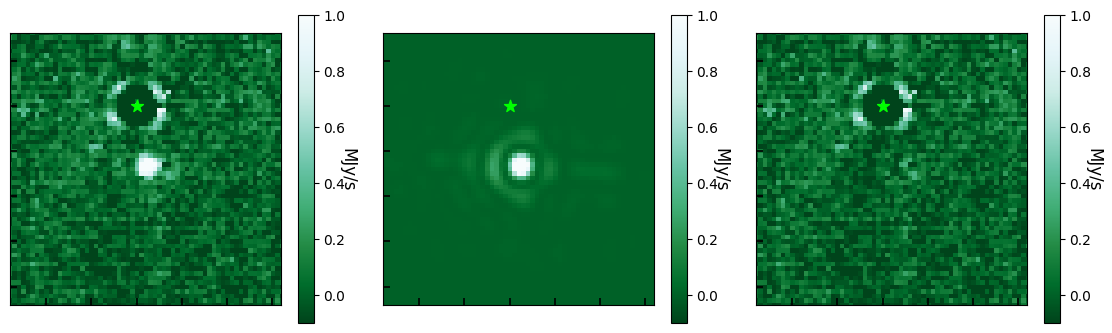

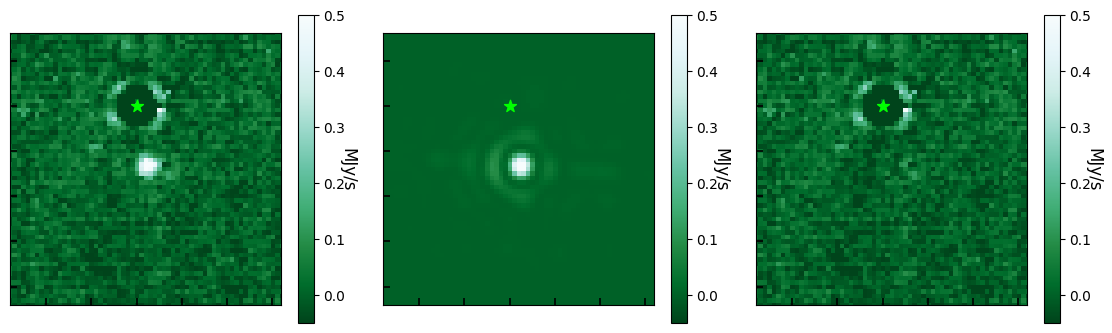

In [13]:
# Photom
plot_photometry(data_sub, final_model_photom, new_center, pos_planet_b, output_dir, name_system, method_subtraction, 
                    cplanet="darkorange", ccorono='lime', stretch="asinh", starsize=80, starsize2=60, lp=8, a=30, vmin=-0.1, vmax=1)

# No photom 
plot_photometry(data_sub_nophotom, final_model_nophotom, new_center, pos_planet_b, output_dir, name_system, method_subtraction, 
                    cplanet="darkorange", ccorono='lime', stretch="asinh", starsize=80, starsize2=60, lp=8, a=30, vmin=-0.05, vmax=0.5)

### 7.4. Measure flux and uncertainties

In [14]:
#### error in an annulus around the planet (should be negligible)
h,w = np.shape(data_sub)
mask_planets = create_circular_mask(h, w, pos_planet_b, 1.5*lambdaD_pix)
mask_anneau = createAnnularMask(h, w,(new_center[1],new_center[0]), sep_planet-1.5*lambdaD_pix/2,sep_planet+1.5*lambdaD_pix/2 )
mask_err = np.ma.mask_or(~mask_anneau, mask_planets)
data_mask = np.ma.array(data_sub, mask = mask_err)
data = data_mask.data[data_mask.mask==False]

flux_err_photom_MJy = np.nanstd(data)

flux_err_photom = np.array(flux_err_photom_MJy)*pixel_area*1e6*1e-26*299792458e6/(np.array(wavelength_filter))**2
flux_err_photom = np.array(flux_err_photom)
print('Uncertainties on the flux :', flux_err_photom)

Uncertainties on the flux : 2.9089299801484784e-21


In [15]:
flux_MJy = np.nansum(final_model_photom)
flux_MJy = np.array(flux_MJy)* 1/attenuation
print(r"Flux planet on the model (MJy/str) : ", flux_MJy)
print(r"Flux planet on the model (muJy) : ", flux_MJy * pixel_area *1e12)
flux_cal = flux_MJy * pixel_area * 1e6 * 1e-26 * 299792458e6 / (np.array(wavelength_filter))**2      
print(r"Flux planet on the model (W/m2/microns) : ", flux_cal)

################ 
flux_MJy = aperture_photom(pos_planet_b,data_sub,1.5*lambdaD_pix)
flux_MJy = np.array(flux_MJy)* 1/attenuation
flux_MJy =  flux_MJy * np.array(aperture_corr)
print(r"Flux planet aper  (MJy/str) : ", flux_MJy)
print(r"Flux planet on the model (muJy) : ", flux_MJy * pixel_area *1e12)
flux_cal_aper = flux_MJy * pixel_area * 1e6 * 1e-26 * 299792458e6 / (np.array(wavelength_filter))**2      
print(r"Flux planet aper (W/m2/microns) : ", flux_cal_aper)


Flux planet on the model (MJy/str) :  90.76696663932643
Flux planet on the model (muJy) :  25.814452937685783
Flux planet on the model (W/m2/microns) :  6.060755186869874e-19
Flux planet aper  (MJy/str) :  114.8896344528049
Flux planet on the model (muJy) :  32.67502673516539
Flux planet aper (W/m2/microns) :  7.671490782481749e-19


### 7.5. Photometry based on the contrast

In [16]:
#Measure flux on the best PSF model :
flux_DN = np.nansum(final_model_nophotom)/attenuation
print(r"Flux planet on the model (DN/s) : ", flux_DN)

# and with aperture correction 
flux_DN_aper = aperture_photom(pos_planet_b,data_sub,1.5*lambdaD_pix)
flux_DN_aper = np.array(flux_DN_aper)*np.array(aperture_corr) *1/np.array(attenuation)
print(r"Flux planet aperture photom (DN/s) : ", flux_DN_aper)

Flux planet on the model (DN/s) :  32.14667815220031
Flux planet aperture photom (DN/s) :  114.8896344528049


### Normalisation for values in DN/s

In [17]:
#Paramètres initiaux de l'étoile :
R = 0.8
p = 29.32767206565099 #parallax gaia
dstar = 1/(p*1e-3)

#specnextgen = np.loadtxt('/Users/mmalin/MIRI/Spectres/Stars/BTnextgen-3400K-logg4-0metal_AGSS2009.txt')
specnextgen = np.loadtxt('/Users/mmalin/MIRI/Spectres/Stars/BTnextgen-3300K-logg4.5-0metal_AGSS2009.txt')

Rs = R* 6.957e8/1e3#conversion en km
d = dstar * 3.26 * 9.46e12 #conversion en km: dstar en pc *3.26 al
v0 = specnextgen[:,0] #en A
v1 = specnextgen[:,1] # erg/cm^2/s/A
flux_dil = v1*(Rs**2/d**2) 
fluxstar = flux_dil*1e-7*1e4*1e4 #1e6 #en W/m2/microns
lambdastar_spec = v0*1e-4 #en microns
fluxstar_spec = fluxstar

#POINTS PHOTOM REEL DE L'ÉTOILE :
#2MASS J, 2MASS H, 2MASS Ks WISE W1 (mean) WISE W2, WISE W3 (mean), WISE W4 (mean)
wavelengths = np.array([1.24, 1.65, 2.16, 3.35, 4.6,11.6])#, 22.1])
flux_Wm2 = np.array([2.90e-12, 2.58e-12, 1.59e-12,5.26e-13,2.42e-13,1.73e-14]) #flux en W.m2
err_Wm2 = np.array([4.84e-14, 1.27e-13,4.16e-14,1.79e-14,4.56e-15,2.59e-16])
flux_SED = flux_Wm2/wavelengths
err_SED = err_Wm2/wavelengths

fluxstar_spec_interp = np.interp(wavelengths,lambdastar_spec, fluxstar_spec)

# chi2 entre modele et données photom
coef = np.arange(0.5, 6, 0.01)
chi2 = np.zeros(len(coef))
dof = len(wavelengths)-1 # nb data points - nb parameters

# remove the last wavelengths (risk of disk contamination)
for c in range(len(coef)):
    chi2[c] = np.sum(((np.array(flux_SED[:-1]) - coef[c]*np.array(fluxstar_spec_interp[:-1]))/np.array(err_SED[:-1]))**2)/dof

bestcoef = (coef[np.argwhere(chi2 == np.min(chi2))])[0]
print('Best coef:',bestcoef[0])
print('Min chi2 :', np.nanmin(chi2))

#RESCALE THE MODEL 
fluxstar_spec *= bestcoef

#Synthetic Photom points for SPHERE
synth_wavelength_photom_sphere = np.array([15856.903749345, 16655.252378861]) *1e-4 #en microns
synth_photom_sphere = np.array([315248.63983581	, 304194.35481886])
synth_photom_sphere = synth_photom_sphere*(Rs**2/d**2) *1e-7*1e4*1e4 #dilué + en W/m2/microns
print("SPHERE H2H3 flux (W/m2/microns) :", synth_photom_sphere)
synth_photom_sphere *= bestcoef
print("SPHERE H2H3 flux (W/m2/microns) x best coeff :", synth_photom_sphere)

# Spectre Teff=3400K et logg=4.5
synth_wavelength_photom = np.array([105542.38813308,113013.46845431,155079.49825604 ]) *1e-4 #en microns
#synth_photom = np.array([501.34898921011,383.50317561351,112.55664575276])
# Spectre Teff=3300K et logg=4.5
synth_photom = np.array([480.46021851443,367.67424996019,108.00640204058])
synth_photom_MIRI = synth_photom*(Rs**2/d**2) *1e-7*1e4*1e4 *bestcoef

fluxstar = synth_photom[1]*(Rs**2/d**2) *1e-7*1e4*1e4 #dilué + en W/m2/microns
fluxstar *= bestcoef
print('Flux star MIRI filter :', fluxstar)

Best coef: 1.8400000000000012
Min chi2 : 1.4766848003621589
SPHERE H2H3 flux (W/m2/microns) : [8.83110223e-13 8.52143707e-13]
SPHERE H2H3 flux (W/m2/microns) x best coeff : [1.62492281e-12 1.56794442e-12]
Flux star MIRI filter : [1.89514624e-15]


### Method 1 with corono images

In [18]:
path_data = "/Users/mmalin/MIRI/Corono/DATA/TWA7/"
aperture_corr_5 = 1.2073514168733441
aperture_corr_15 = 1.0344683908760721

num_obs = [1,4]
#Flux ratio between the PSF and the corono image in the comm data (indep of the target, measure previously): 
I_ratio_coro_comm = [64.9152153,  65.46155754, 63.43823245, 62.87703883, 58.84998801, 61.44419118, 61.60166699, 64.92428159, 65.15499864]
I_ratio_coro_comm = np.mean(I_ratio_coro_comm)

#Measure flux of the star 
files_cal = sorted(glob.glob(path_data+"/stage2_no_photom/obs"+str(num_obs[0])+"/*.fits"))

#Aperture = 15 lambda/D
#Retrieve the data + sigma clipping
data_cal = fits.open(files_cal[0])[1].data
data_target = clean_data(data_cal)
#plt.imshow(data_target, origin='lower', norm=LogNorm())
#plt.colorbar()
#plt.show()
disque = CircularAperture((center_corono[1],center_corono[0]) , r = 15*lambdaD_pix)
mask = disque.to_mask(method = 'center').multiply(data_target)
mask = mask[mask>0]
flux_on_target = np.nansum(mask) * aperture_corr_15

# PSF off-axis 
I_psf1 = np.array(I_ratio_coro_comm) * np.array(flux_on_target)
contraste_norm_com = I_psf1/flux_DN
flux_norm_com = fluxstar/contraste_norm_com

contraste_norm_com = I_psf1/flux_DN_aper
flux_norm_com_aper = fluxstar/contraste_norm_com

### Method 2 with TA data

In [19]:
I_ratio_TA_comm = [17.39208248, 17.03916933, 17.32457582]
I_ratio_TA_comm = np.mean(I_ratio_TA_comm)

flux_star_TA_data = np.ndarray((nb_filters))
files_TA = sorted(glob.glob(path_data+"/stage2_no_photom/obs"+str(num_obs[0])+"/TA/*.fits"))
data_TA_1A = fits.open(files_TA[0])[1].data
data_TA_1B = fits.open(files_TA[1])[1].data
data_TA_target = (data_TA_1A-data_TA_1B)
data_TA_target = np.nan_to_num(data_TA_target) 
data_TA_target = clean_data(data_TA_target)
#Filtre à 10 microns (pos1, pos2), 11 microns puis filtre à 15 microns
pos_TA = np.where(data_TA_target[100:250, 100:200] == np.nanmax(data_TA_target[100:250, 100:200]))
pos_TA = pos_TA[1][0]+100, pos_TA[0][0]+100

disque_TA = CircularAperture(pos_TA , r = 5*lambdaD_pix)
mask = disque_TA.to_mask(method = 'center').multiply(data_TA_target)
mask = mask[mask>0]
flux_star_TA_data = np.nansum(mask) * aperture_corr_5

I_psf2 = np.array(I_ratio_TA_comm) * np.array(flux_star_TA_data)
contraste_norm_com_TA = I_psf2/flux_DN
flux_norm_com_TA = fluxstar/contraste_norm_com_TA

contraste_norm_com_TA = I_psf2/flux_DN_aper
flux_norm_com_TA_aper = fluxstar/contraste_norm_com_TA

#### Method 3 with simu WebbPSF

In [20]:
__, __, sum_value_off_axis_psf = best_off_axis_PSF(data_red_roll1,new_center,'F1065C',rmin=2,rmax=6,
                                                             bounds=((None,None),(-1,1),(-1,1)),
                                                             plot_model=False,vmin=-2,vmax=10) #priors=(1e2,0,0),
I_psf3 = sum_value_off_axis_psf
contraste_norm_simu = I_psf3/flux_DN
flux_norm_simu = fluxstar/contraste_norm_simu

contraste_norm_simu = I_psf3/flux_DN_aper
flux_norm_simu_aper = fluxstar/contraste_norm_simu

2025-02-25 17:23:20,386 - stpipe - WARNING - /Users/mmalin/anaconda3/envs/jwst_latest/lib/python3.11/site-packages/astropy/io/fits/card.py:1036: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn(

2025-02-25 17:24:11,297 - stpipe - WARNING - /Users/mmalin/anaconda3/envs/jwst_latest/lib/python3.11/site-packages/astropy/io/fits/card.py:1036: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn(



In [21]:
print('Estimation de la PSF stellaire off-axis : ')
print('- norm corono : ', I_psf1)
print('- norm TA : ', I_psf2)
print('- norm simu : ', I_psf3)

print('Norm corono = ', np.around(flux_norm_com[0],22))
print('Norm TA = ', np.around(flux_norm_com_TA[0],22))
print('Norm simu = ', np.around(flux_norm_simu[0],22))
print('Norm cal pipeline = ', np.around(flux_cal,22))

Estimation de la PSF stellaire off-axis : 
- norm corono :  130646.7030429237
- norm TA :  77019.9329799362
- norm simu :  214981.26057024457
Norm corono =  4.663e-19
Norm TA =  7.91e-19
Norm simu =  2.834e-19
Norm cal pipeline =  6.061e-19


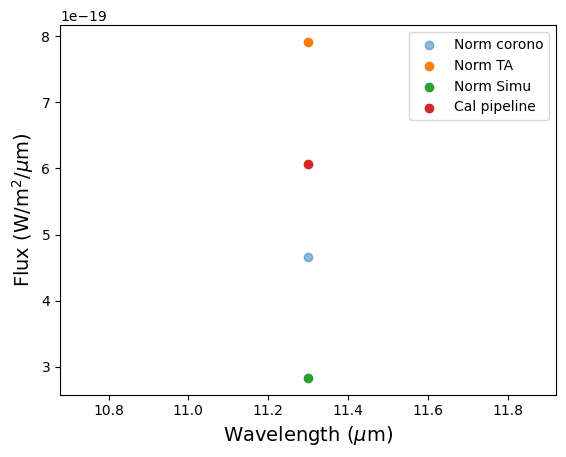

In [22]:
plt.scatter(11.3, flux_norm_com[0], label='Norm corono', alpha=0.5)
plt.scatter(11.3, flux_norm_com_TA[0], label='Norm TA')
plt.scatter(11.3, flux_norm_simu[0], label='Norm Simu')
plt.scatter(11.3, flux_cal, label='Cal pipeline')
#plt.xlim(10,16)
#plt.ylim(1e-20, 1e-18)
plt.xlabel("Wavelength ($\mu$m)",fontsize=14)
plt.ylabel("Flux (W/m$^2$/$\mu$m)",fontsize=14)
plt.legend()
plt.savefig(output_dir+f'{name_system}_{method_subtraction}_roll'+str(nb_roll)+'.pdf')
plt.show()